In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/UDDLL/Data/Tiki book kaggel'


In [3]:
df = pd.read_csv(base_dir + '/book_data.csv')
df.drop(columns=['product_id', 'title', 'cover_link'], inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop = True)

df

,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
1,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
...,...,...,...,...,...,...,...,...,...
1204,Misaki Ichijo,129000,95400,75.0,Light novel,16,4.6,352,Nhà Xuất Bản Dân Trí
1205,Henri Charriere,349000,311000,374.0,Tiểu Thuyết,82,5.0,706,Nhà Xuất Bản Hội Nhà Văn
1206,Bertrand Russell,85000,48900,147.0,Triết Học,20,5.0,236,Nhà Xuất Bản Khoa Học Xã Hội
1207,John C. Maxwell,179000,107500,378.0,"Sách quản trị, lãnh đạo",33,5.0,436,Nhà Xuất Bản Lao Động


In [4]:
# Khởi tạo LabelEncoder
le = LabelEncoder()

# Danh sách các cột cần mã hóa
cols_to_encode = ['authors', 'category', 'manufacturer']

# Tạo một từ điển để lưu LabelEncoder cho mỗi cột
le_dict = {}

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

df

,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,347,108000,64800,53075.0,175,11481,5.0,244,10
1,347,108000,64800,53075.0,175,11481,5.0,244,10
2,544,86000,59900,7929.0,157,780,4.8,184,23
3,734,210000,126000,17896.0,88,3623,4.8,430,10
4,588,79000,47400,24668.0,199,5131,5.0,228,7
...,...,...,...,...,...,...,...,...,...
1204,485,129000,95400,75.0,85,16,4.6,352,6
1205,253,349000,311000,374.0,175,82,5.0,706,10
1206,80,85000,48900,147.0,183,20,5.0,236,11
1207,330,179000,107500,378.0,153,33,5.0,436,15


In [5]:
# Chuyển đổi tất cả các giá trị trong DataFrame thành số
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

# Xóa các hàng chứa giá trị NaN
df = df.dropna()


In [6]:
# Đặc trưng X
X = df.drop(columns=['quantity'])

# Mục tiêu y
y = df['quantity']

# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.log1p(y)

In [7]:
# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Xây dựng mạng neural
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])



In [9]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

# Khởi tạo learning rate ban đầu
initial_learning_rate = 0.001

# Tạo một lịch trình learning rate giảm dần theo hàm mũ
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Sử dụng lịch trình learning rate với optimizer Adam
optimizer = Adam(learning_rate=lr_schedule)

# Biên dịch mô hình với optimizer mới
model.compile(optimizer=optimizer, loss='mean_squared_error')


from keras.callbacks import EarlyStopping, ModelCheckpoint



# Khởi tạo callback ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Huấn luyện mô hình với các callback
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.1, callbacks=[model_checkpoint])




Epoch 1/500
14/14 [==============================] - 11s 79ms/step - loss: 38.0735 - val_loss: 27.0909
Epoch 2/500
 1/14 [=>............................] - ETA: 0s - loss: 25.1813

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 0s 22ms/step - loss: 21.3465 - val_loss: 6.9543
Epoch 3/500
14/14 [==============================] - 0s 15ms/step - loss: 23.3002 - val_loss: 11.7283
Epoch 4/500
14/14 [==============================] - 0s 29ms/step - loss: 15.5482 - val_loss: 5.5847
Epoch 5/500
14/14 [==============================] - 0s 17ms/step - loss: 15.1977 - val_loss: 7.2705
Epoch 6/500
14/14 [==============================] - 0s 22ms/step - loss: 11.3943 - val_loss: 4.1998
Epoch 7/500
14/14 [==============================] - 0s 20ms/step - loss: 11.8280 - val_loss: 4.4072
Epoch 8/500
14/14 [==============================] - 0s 32ms/step - loss: 10.9129 - val_loss: 4.0153
Epoch 9/500
14/14 [==============================] - 0s 14ms/step - loss: 10.2517 - val_loss: 4.4252
Epoch 10/500
14/14 [==============================] - 1s 41ms/step - loss: 9.2720 - val_loss: 3.7907
Epoch 11/500
14/14 [==============================] - 0s 20ms/step - loss: 10.5041 - val_loss: 5.3383


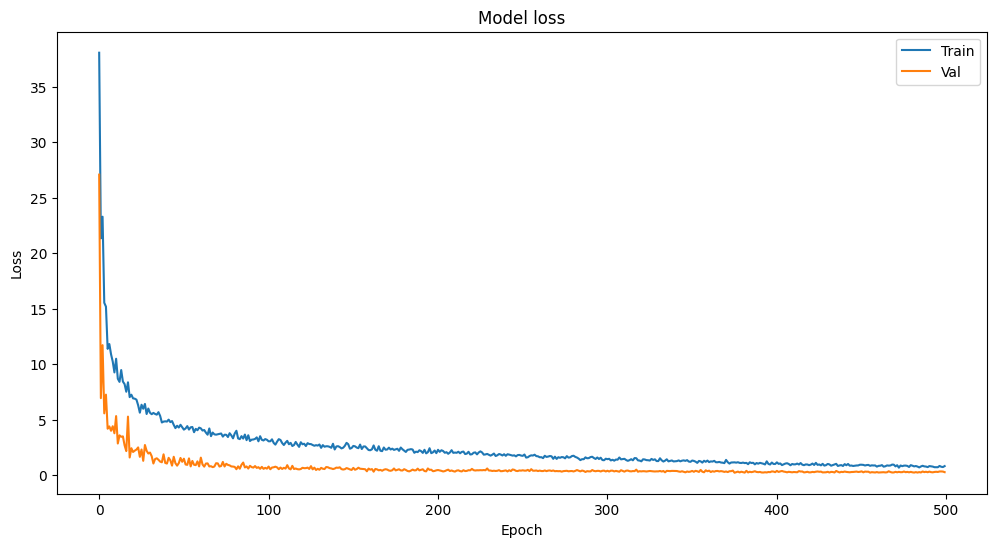

In [10]:
# Vẽ biểu đồ loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [11]:
from tensorflow.keras.models import load_model

# Tải mô hình từ file
model = load_model('best_model.h5')


In [12]:
# Đánh giá mô hình
mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse}')

8/8 [==============================] - 0s 3ms/step - loss: 0.3370
Test MSE: 0.33699098229408264


In [13]:
# áp dụng trên tập test
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


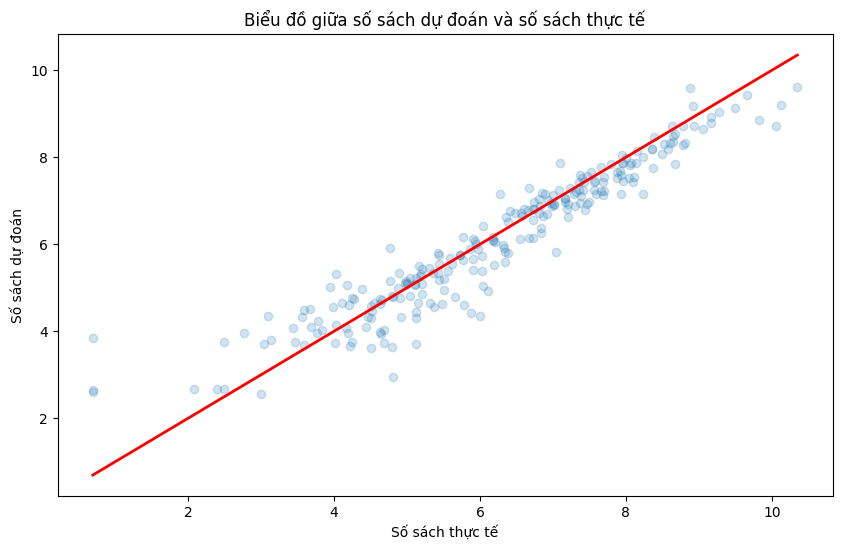

In [14]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Số sách thực tế')
plt.ylabel('Số sách dự đoán')
plt.title('Biểu đồ giữa số sách dự đoán và số sách thực tế')
plt.show()


In [15]:
# Lấy lại giá trị y đúng
y_test_original = np.expm1(y_test.values).flatten()
y_pred_original = np.expm1(y_pred).flatten()

# Lấy lại giá trị đã chuẩn hóa
X_original = scaler.inverse_transform(X_test)

# Chuyển đổi X_original thành DataFrame để dễ dàng thao tác
X_original_df = pd.DataFrame(X_original, columns=df.drop(columns=['quantity']).columns)

# Lấy lại giá trị đã mã hóa
for col in cols_to_encode:
    X_original_df[col] = le_dict[col].inverse_transform(X_original_df[col].astype(int))



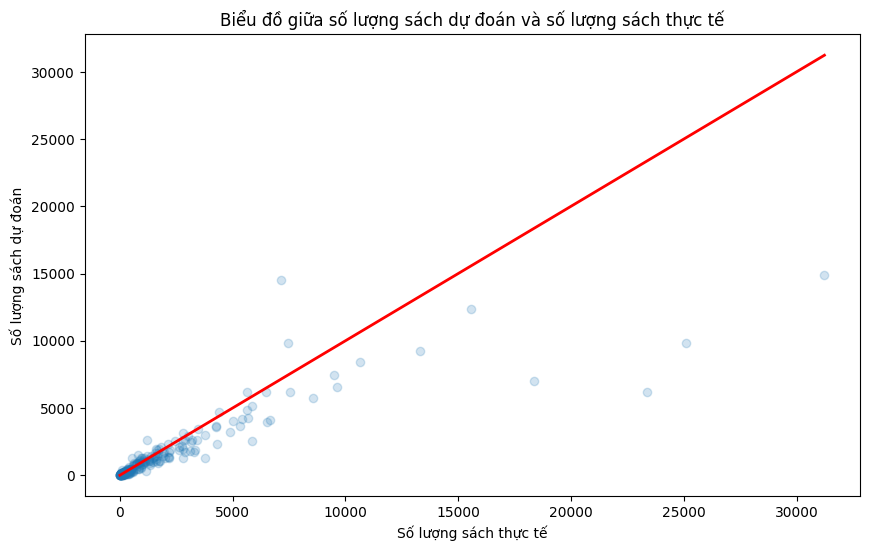

In [16]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.2)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r', lw=2)
plt.xlabel('Số lượng sách thực tế')
plt.ylabel('Số lượng sách dự đoán')
plt.title('Biểu đồ giữa số lượng sách dự đoán và số lượng sách thực tế')
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error

# Tính giá trị sai số trung bình
mae = mean_absolute_error(y_test_original, y_pred_original)


print('Giá trị sai số trung bình: ', mae)


Giá trị sai số trung bình:  646.0626003722513


In [18]:
# Tính sai số
errors = np.abs(y_test_original - y_pred_original)

# Tính sai số phần trăm
percentage_errors = 100 * errors / y_test_original

# Thêm cột 'Y thực tế', 'Y dự đoán', 'Sai số', và 'Sai số phần trăm' vào DataFrame gốc
X_original_df['Y thực tế'] = y_test_original
X_original_df['Y dự đoán'] = y_pred_original
X_original_df['Sai số'] = errors
X_original_df['Sai số phần trăm'] = percentage_errors

X_original_df


,authors,original_price,current_price,category,n_review,avg_rating,pages,manufacturer,Y thực tế,Y dự đoán,Sai số,Sai số phần trăm
0,Yasuhisa Hara,45000.0,39100.0,Kingdom - Tập 39,2.0,5.0,216.0,NXB Trẻ,90.0,36.310120,53.689880,59.655423
1,Thái Phạm,299000.0,299000.0,Sách tư duy - Kỹ năng sống,2808.0,5.0,352.0,Nhà Xuất Bản Thế Giới,15571.0,12343.090820,3227.909180,20.730263
2,Tracy Hogg,199000.0,139300.0,Sách Làm Cha Mẹ,473.0,5.0,512.0,Nhà Xuất Bản Lao Động,2808.0,3116.933350,308.933350,11.001900
3,Gege Akutami,30000.0,28100.0,Chú Thuật Hồi Chiến Tập 8,393.0,5.0,192.0,Nhà Xuất Bản Kim Đồng,2175.0,1691.435181,483.564819,22.232865
4,Trịnh Nam Trân,84000.0,64900.0,Tiểu Thuyết,1.0,5.0,184.0,Nhà Xuất Bản Phụ Nữ Việt Nam,21.0,76.979408,55.979408,266.568611
...,...,...,...,...,...,...,...,...,...,...,...,...
237,Mặc Hương Đồng Khứu,159000.0,119000.0,Truyện đam mỹ,112.0,5.0,368.0,Nhà Xuất Bản Hà Nội,480.0,438.514404,41.485596,8.642832
238,Dan Ariely,169000.0,112000.0,Sách tư duy - Kỹ năng sống,133.0,4.8,404.0,Nhà Xuất Bản Lao Động,1012.0,810.864258,201.135742,19.875073
239,Anne Taylor,228000.0,150400.0,Sách Học Tiếng Anh,213.0,4.6,240.0,Nhà Xuất Bản Compass Publishing,791.0,1478.014648,687.014648,86.853938
240,Nguyễn Huy Thiệp,360000.0,266400.0,Phóng sự - Ký sự - Bút ký,19.0,5.0,498.0,NXB Trẻ,134.0,115.053879,18.946121,14.138896


In [19]:
X_original_df.to_csv('Pred_book_sold.csv', index=False)

In [ ]:
# Tính sai số
errors = np.abs(y_test_original - y_pred_original)

# Tính sai số
errors = np.abs(y_test_original - y_pred_original)

# Tìm những mẫu có sai số lớn hơn 1000
large_error_indices = np.where(errors > 1000)

# Tạo DataFrame mới từ X_original_df với chỉ những mẫu có sai số lớn hơn 1000
large_error_df = X_original_df.iloc[large_error_indices[0]].copy()

# Thêm cột 'Y thực tế', 'Y dự đoán', và 'Sai số' vào DataFrame
large_error_df['Y thực tế'] = y_test_original[large_error_indices[0]]
large_error_df['Y dự đoán'] = y_pred_original[large_error_indices[0]]
large_error_df['Sai số'] = errors[large_error_indices[0]]


large_error_df.sort_values('Sai số', ascending=False, inplace=True)

large_error_df



,authors,original_price,current_price,category,n_review,avg_rating,pages,manufacturer,Y thực tế,Y dự đoán,Sai số
94,Alan Phan,69000.0,69000.0,Bài học kinh doanh,2272.0,4.8,211.0,Nhà Xuất Bản Thế Giới,23364.0,6899.458008,16464.541992
122,Phil Town,299000.0,299000.0,Bài học kinh doanh,4311.0,4.8,280.0,Nhà Xuất Bản Thế Giới,31234.0,15280.576172,15953.423828
130,Trang Anh,250000.0,169000.0,Sách Luyện Thi Đại Học - Cao Đẳng,2407.0,4.8,606.0,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,7154.0,22285.128906,15131.128906
60,Albert Rutherford,99000.0,54450.0,Sách tư duy - Kỹ năng sống,4341.0,4.8,204.0,Nhà Xuất Bản Phụ Nữ,25115.0,12988.506836,12126.493164
114,Yuval Noah Harari,209000.0,125400.0,Tiểu Thuyết,1681.0,4.6,434.0,Nhà Xuất Bản Thế Giới,18353.0,8736.075195,9616.924805
51,Frederic Laloux,190000.0,127300.0,Sách kỹ năng làm việc,498.0,4.8,208.0,Nhà Xuất Bản Thế Giới,5867.0,2533.150146,3333.849854
21,Anthony William,185000.0,130000.0,Cơ Thể Tự Chữa Lành: Thực Phẩm Thay Đổi Cuộc Sống,1003.0,4.8,464.0,Nhà Xuất Bản Thanh Niên,6540.0,3791.974365,2748.025635
214,Pilot Nguyễn,120000.0,97100.0,Sách kỹ năng làm việc,184.0,4.7,248.0,Nhà Xuất Bản Tổng hợp TP.HCM,3763.0,1324.832642,2438.167358
202,Cole Nussbaumer Knaflic,319000.0,223000.0,Sách kỹ năng làm việc,1641.0,5.0,280.0,Nhà Xuất Bản Thế Giới,8567.0,6293.015137,2273.984863
1,Thái Phạm,299000.0,299000.0,Sách tư duy - Kỹ năng sống,2808.0,5.0,352.0,Nhà Xuất Bản Thế Giới,15571.0,17673.744141,2102.744141


In [ ]:
# Tính sai số phần trăm
percentage_errors = np.abs((y_test_original - y_pred_original) / y_test_original) * 100

# Tìm những mẫu có sai số phần trăm lớn hơn 20%
large_error_indices = np.where(percentage_errors > 20)

# Tạo DataFrame mới từ X_original_df với chỉ những mẫu có sai số phần trăm lớn hơn 20%
large_error_df = X_original_df.iloc[large_error_indices[0]].copy()

# Thêm cột 'Y thực tế', 'Y dự đoán', và 'Sai số phần trăm' vào DataFrame
large_error_df['Y thực tế'] = y_test_original[large_error_indices[0]]
large_error_df['Y dự đoán'] = y_pred_original[large_error_indices[0]]
large_error_df['Sai số phần trăm'] = percentage_errors[large_error_indices[0]]

large_error_df.sort_values('Sai số phần trăm', ascending=False, inplace=True)
large_error_df


,authors,original_price,current_price,category,n_review,avg_rating,pages,manufacturer,Y thực tế,Y dự đoán,Sai số phần trăm
128,Yamamoto Tsunetomo,135000.0,121500.0,Lĩnh vực khác,1.0,5.0,420.0,Nhà Xuất Bản Dân Trí,1.0,64.548088,6354.808807
169,Ohmura Tomoko,52000.0,44000.0,Truyện tranh Ehon,0.0,0.0,38.0,Nhà Xuất Bản Thế Giới,1.0,19.957783,1895.778275
43,Neil Gaiman,110000.0,88000.0,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,0.0,0.0,315.0,Nhà Xuất Bản Văn Học,1.0,17.190014,1619.001389
186,Rando Kim,129000.0,122550.0,Sách tư duy - Kỹ năng sống,4.0,5.0,250.0,Nhà Xuất Bản Hà Nội,11.0,51.449310,367.721003
62,Luis Sepulveda,178000.0,103240.0,Truyện kể cho bé,1.0,5.0,839.0,Nhà Xuất Bản Hội Nhà Văn,15.0,57.951328,286.342189
...,...,...,...,...,...,...,...,...,...,...,...
194,Nguyễn Nhật Ánh,35000.0,24500.0,Truyện ngắn - Tản văn - Tạp Văn,5.0,4.5,128.0,NXB Trẻ,91.0,71.335007,21.609883
218,Haruki Murakami,168000.0,100800.0,Lĩnh vực khác,52.0,5.0,400.0,Nhà Xuất Bản Dân Trí,392.0,307.473694,21.562833
236,Bertrand Russell,85000.0,48900.0,Triết Học,20.0,5.0,236.0,Nhà Xuất Bản Khoa Học Xã Hội,147.0,115.603195,21.358371
16,Osho,168000.0,110800.0,Sách nghệ thuật sống đẹp,121.0,5.0,368.0,Nhà Xuất Bản Dân Trí,911.0,717.372498,21.254391
